In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

from lib import *


In [20]:
path = "data/userdata_rows_backup.csv"
names = get_name(path)
times = times(path)*1E-3


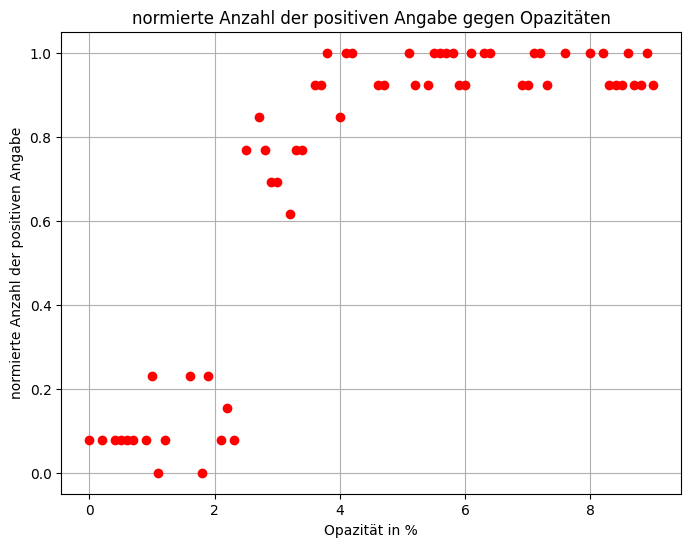

In [21]:

x = np.loadtxt('opacity_values.txt')*100

arr = import_data(path)
y = calculate_true_probabilities(arr)



plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ro')
plt.title('normierte Anzahl der positiven Angabe gegen Opazitäten')
plt.xlabel('Opazität in %')
plt.ylabel('normierte Anzahl der positiven Angabe')
plt.grid(True)
plt.show()

Optimierte Parameter: a = 2.5664564271605665, b = 2.215366863466705


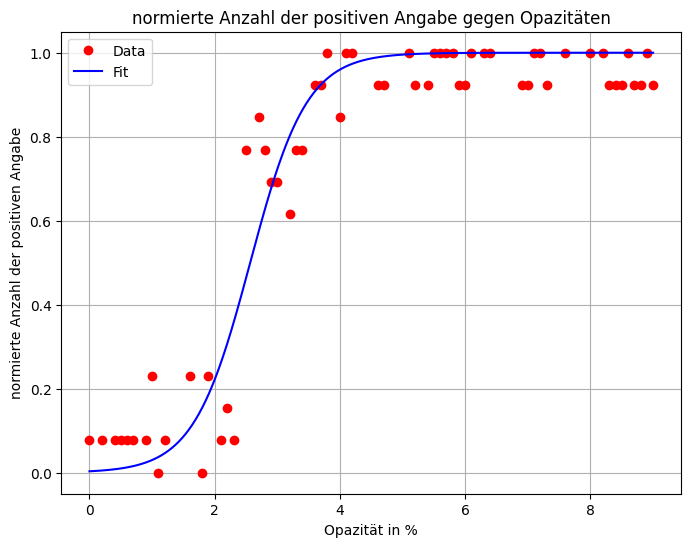

In [22]:
initial_guess = [2, 2]

result = sc.optimize.minimize(chi_square, initial_guess, args=(x, y, np.full_like(y,0.3)))
a_opt, b_opt = result.x
print(f"Optimierte Parameter: a = {a_opt}, b = {b_opt}")


x_fit = np.linspace(min(x), max(x), 1000) 
y_fit = logistic_fkt(x_fit, a_opt, b_opt)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ro', label="Data")
plt.plot(x_fit, y_fit, 'b-', label="Fit")
plt.title('normierte Anzahl der positiven Angabe gegen Opazitäten')
plt.xlabel('Opazität in %')
plt.ylabel('normierte Anzahl der positiven Angabe')
plt.grid(True)
plt.legend()
plt.show()




In [23]:
#kleinster Threshold

threshold_values = np.array([])
arr = import_data_for_min_treshold(path)
for i in arr:
    result = sc.optimize.minimize(chi_square, initial_guess, args=(x, i, np.full_like(y,0.3)))
    a_opt, b_opt = result.x
    #print(f"Optimierte Parameter: a = {a_opt}, b = {b_opt}")
    threshold_values = np.append(threshold_values, a_opt)  

idx = np.argmin(threshold_values)
kleinster_threshold = threshold_values[idx]
name_kleinste_zeit = names[idx]

print(f"{name_kleinste_zeit} hatte mit einem Treshold von {kleinster_threshold:.3f} den kleinsten Wert!")

    



Datenschutzkonform_ist_das_nicht hatte mit einem Treshold von 1.708 den kleinsten Wert!


In [24]:
#avg time
mittlere_zeit = np.mean(times)
print("Mittlere Bearbeitungszeit:", mittlere_zeit, "s")


#schnellte Bearbeitung
idx = np.argmin(times)
schnellster = times[idx]
name_kleinste_zeit = names[idx]

print(f"{name_kleinste_zeit} hatte mit einem Treshold von {schnellster:.3f} den kleinsten Wert!")


Mittlere Bearbeitungszeit: 131.18715384615385 s
Jasmin h hatte mit einem Treshold von 82.948 den kleinsten Wert!
